In [1]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [54]:
def plot(ax, df, label, key, color):
    means =  np.mean([x[key].values for x in df], axis=0)
    stds =  np.std([x[key].values for x in df], axis=0)
    mins =  np.min([x[key].values for x in df], axis=0)
    maxs =  np.max([x[key].values for x in df], axis=0)
    
    # ax.plot(means, c=color, label=label)
    # ax.fill_between(range(len(means)), means - stds, means + stds, color=color, alpha=0.3, linewidth=0.0)
    ax.plot(means, label=label)
    ax.fill_between(range(len(means)), means - stds, means + stds, alpha=0.3, linewidth=0.0)

def plot_average(algs,key,experiment,resultsdir='results',traintest='train'):
    fig_dpi=96
    fig_ext='png'
    fig_dir=resultsdir
    fig = plt.figure(figsize=(10.0, 3.0))
    axes1 = fig.add_subplot(1, 1, 1)
    for alg in algs:
        df=[]
        csvfiles=glob.glob(os.path.join(resultsdir+'/'+ 
            experiment+'_'+alg+'_Synthetic*_*_'+traintest+'.csv'))
        for csvfile in csvfiles:    
            df.append(pd.read_csv(csvfile))
        plot(axes1,df,'label',key,'Red')
    axes1.set_ylabel(key)
    axes1.legend(algs)
    fig.tight_layout();
    # fig.show();
    plt.savefig(fig_dir+'/average_'+experiment+'_'+key+'.'+fig_ext,dpi=fig_dpi,bbox_inches='tight')

/products/anaconda3/envs/glodismo_classifier/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/products/anaconda3/envs/glodismo_classifier/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


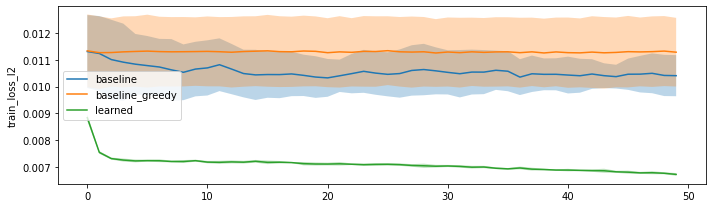

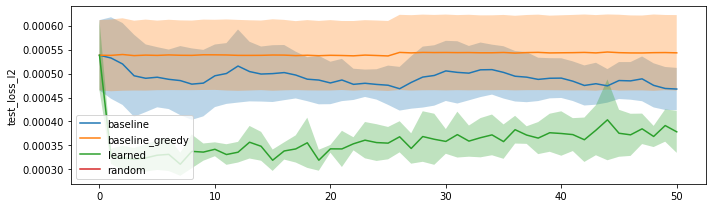

In [55]:
plot_average(['baseline','baseline_greedy','learned'],'train_loss_l2','pooling','results2','train')
plot_average(['baseline','baseline_greedy','learned','random'],'test_loss_l2','pooling','results2','test')
          

In [56]:
def plot_history(algs,key,experiment,resultsdir='results',traintest='train'):
    fig_dpi=96
    fig_ext='png'
    fig_dir=resultsdir
    fig = plt.figure(figsize=(10.0, 3.0))
    axes1 = fig.add_subplot(1, 1, 1)
    for alg in algs:
        msft = pd.concat(map(pd.read_csv, glob.glob(os.path.join(resultsdir+'/'+ 
            experiment+'_'+alg+'_Synthetic*_*_'+traintest+'.csv'))))
        axes1.plot(msft[key].values)
    axes1.set_ylabel(key)
    axes1.legend(algs)
    fig.tight_layout();
    # fig.show();
    plt.savefig(fig_dir+'/history_'+experiment+'_'+key+'.'+fig_ext,dpi=fig_dpi,bbox_inches='tight')


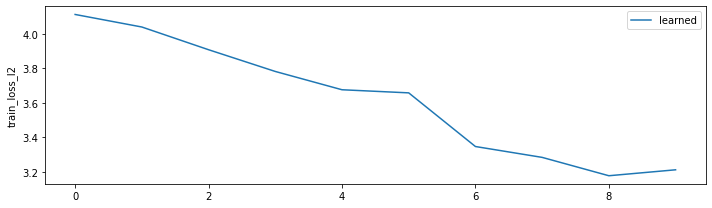

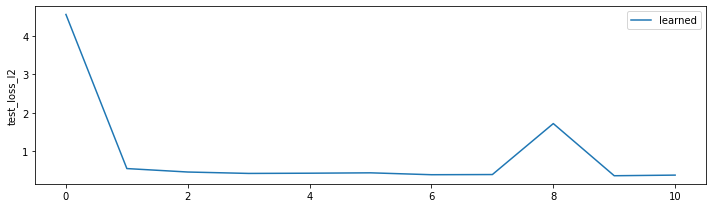

In [57]:
plot_history(['learned'],'train_loss_l2','mini_pooling','results','train')
plot_history(['learned'],'test_loss_l2','mini_pooling','results','test')


/products/anaconda3/envs/glodismo_classifier/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]
/products/anaconda3/envs/glodismo_classifier/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


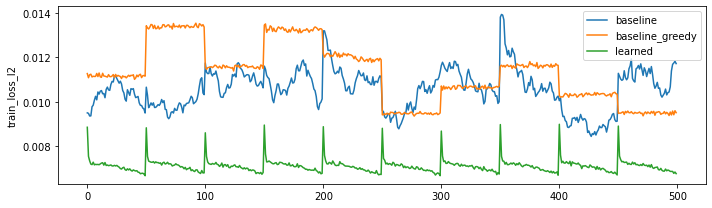

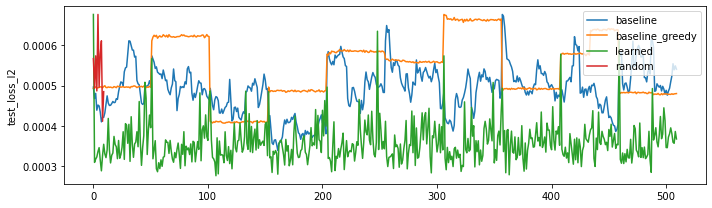

In [6]:
plot_history(['baseline','baseline_greedy','learned'],'train_loss_l2','pooling','results2','train')
plot_history(['baseline','baseline_greedy','learned','random'],'test_loss_l2','pooling','results2','test')